<center><h1><font color=yellow><i> Ozone - DNN </i></font></h1></center>

# Importation des librairies :

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Data

## Import Data

In [5]:
data=pd.read_csv('ozone_complet_preprocessed.csv')
df_ozone=data
df_ozone.drop('Unnamed: 0', axis=1, inplace=True)
df_ozone.head()

,date,maxO3,T6,T9,T12,T15,T18,Ne6,Ne9,Ne12,...,Vvit9,Vdir12,Vvit12,Vdir15,Vvit15,Vdir18,Vvit18,Vx,maxO3v,maxO3l
0,1995-04-01,47.6,10.1,11.6,13.3,13.6,12.2,8.0,8.0,8.0,...,4.0,300.0,4.0,340.0,4.0,20.0,4.0,-3.4641,62.2,56.2
1,1995-04-02,56.2,9.5,9.4,13.8,17.4,16.3,8.0,8.0,7.0,...,2.0,180.0,3.0,110.0,1.0,350.0,2.0,0.0000,47.6,61.8
2,1995-04-03,61.8,3.6,8.0,16.8,21.5,20.2,4.0,5.0,2.0,...,2.0,340.0,1.0,170.0,2.0,170.0,3.0,-0.3420,56.2,50.8
3,1995-04-04,50.8,9.5,10.5,11.4,12.2,11.4,8.0,7.0,7.0,...,4.0,350.0,3.0,350.0,3.0,350.0,4.0,-0.5209,61.8,59.8
4,1995-04-05,59.8,9.8,10.8,13.8,14.3,13.3,8.0,7.0,8.0,...,2.0,280.0,1.0,320.0,3.0,350.0,4.0,-0.9848,50.8,53.4


In [34]:
# Convertir la colonne 'date' en type datetime 
df_ozone['date'] = pd.to_datetime(df_ozone['date'])

# Définir une date de référence
date_reference = pd.to_datetime('1995-04-01')

# Calculer le nombre de jours depuis la date de référence
df_ozone['days_since_reference'] = (df_ozone['date'] - date_reference).dt.days

# Afficher les résultats
print(df_ozone[['date', 'days_since_reference']])
df_ozone=df_ozone.drop(columns='date',axis=1)


           date  days_since_reference
0    1995-04-01                     0
1    1995-04-02                     1
2    1995-04-03                     2
3    1995-04-04                     3
4    1995-04-05                     4
...         ...                   ...
1385 2002-09-25                  2734
1386 2002-09-26                  2735
1387 2002-09-27                  2736
1388 2002-09-28                  2737
1389 2002-09-29                  2738

[1390 rows x 2 columns]


## Features and output

In [35]:
y=df_ozone['maxO3l']
X=df_ozone.drop('maxO3l',axis=1)

In [36]:
X.head()

,maxO3,T6,T9,T12,T15,T18,Ne6,Ne9,Ne12,Ne15,...,Vvit9,Vdir12,Vvit12,Vdir15,Vvit15,Vdir18,Vvit18,Vx,maxO3v,days_since_reference
0,47.6,10.1,11.6,13.3,13.6,12.2,8.0,8.0,8.0,8.0,...,4.0,300.0,4.0,340.0,4.0,20.0,4.0,-3.4641,62.2,0
1,56.2,9.5,9.4,13.8,17.4,16.3,8.0,8.0,7.0,0.0,...,2.0,180.0,3.0,110.0,1.0,350.0,2.0,0.0000,47.6,1
2,61.8,3.6,8.0,16.8,21.5,20.2,4.0,5.0,2.0,2.0,...,2.0,340.0,1.0,170.0,2.0,170.0,3.0,-0.3420,56.2,2
3,50.8,9.5,10.5,11.4,12.2,11.4,8.0,7.0,7.0,7.0,...,4.0,350.0,3.0,350.0,3.0,350.0,4.0,-0.5209,61.8,3
4,59.8,9.8,10.8,13.8,14.3,13.3,8.0,7.0,8.0,8.0,...,2.0,280.0,1.0,320.0,3.0,350.0,4.0,-0.9848,50.8,4


In [37]:
X.describe()

,maxO3,T6,T9,T12,T15,T18,Ne6,Ne9,Ne12,Ne15,...,Vvit9,Vdir12,Vvit12,Vdir15,Vvit15,Vdir18,Vvit18,Vx,maxO3v,days_since_reference
count,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,...,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000
mean,84.928269,12.303096,16.388913,19.420806,20.346364,18.783153,4.998559,5.159942,5.337176,5.150576,...,3.732901,205.017999,4.508279,208.351332,4.782577,190.820734,4.392369,-0.747871,85.037059,1384.066906
std,23.142702,3.898741,4.127919,4.926189,5.269710,5.079061,2.908986,2.564151,2.315037,2.323004,...,1.872830,105.871965,2.056291,110.564767,2.063139,121.417902,1.765431,3.401020,23.066851,848.879846
min,33.200000,-1.600000,4.500000,3.900000,6.500000,4.400000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.392300,33.200000,0.000000
25%,68.250000,10.000000,13.800000,16.225000,16.800000,15.500000,2.000000,3.000000,4.000000,3.000000,...,2.000000,110.000000,3.000000,100.000000,3.000000,60.000000,3.000000,-3.064200,68.650000,531.250000
50%,81.000000,12.700000,16.700000,19.400000,20.400000,18.600000,6.000000,6.000000,6.000000,6.000000,...,4.000000,220.000000,4.000000,230.000000,5.000000,220.000000,4.000000,-1.026100,81.600000,1481.500000
75%,97.000000,15.100000,19.000000,22.600000,23.800000,22.000000,8.000000,7.000000,7.000000,7.000000,...,5.000000,300.000000,6.000000,300.000000,6.000000,290.000000,6.000000,1.500000,97.000000,2202.750000
max,173.000000,21.700000,28.600000,33.500000,35.500000,34.100000,9.000000,9.000000,8.000000,8.000000,...,12.000000,360.000000,12.000000,360.000000,16.000000,360.000000,12.000000,10.832900,173.000000,2738.000000


> Split our data into **train data** (80% -- 3680 rows) and **test data** (921 rows). 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

## Normalization

In [39]:
from sklearn.preprocessing import MinMaxScaler
# Initialisation du scaler
scaler = MinMaxScaler()
# Normaliser uniquement les caractéristiques (X)
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# DNN

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import keras_tuner


## Model created manually 

In [41]:
model1 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train_normalized.shape[1]], name='hidden_layer1'),
    layers.Dropout(0.3),  # Ajout d'une couche Dropout pour réduire le surajustement
    layers.Dense(32, activation='relu', name='hidden_layer2'),
    layers.Dropout(0.3),  # Ajout d'une couche Dropout pour réduire le surajustement
    layers.BatchNormalization(),
    
    layers.Dense(1, activation='linear', name='output_layer'),  # Changement de l'activation en 'sigmoid'
])

In [42]:
from keras.optimizers import Adam
model1.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='mean_squared_error',
    metrics=['mae'],
)

In [43]:
hist = model1.fit(X_train_normalized,
                 y_train,
                 batch_size=32,
                 epochs=50,
                 validation_data=(X_test_normalized,y_test))

Epoch 1/50


35/35 [==============================] - 2s 9ms/step - loss: 7251.3164 - mae: 82.5482 - val_loss: 6598.5928 - val_mae: 79.1637
Epoch 2/50
35/35 [==============================] - 0s 3ms/step - loss: 5185.8340 - mae: 69.2110 - val_loss: 4896.0176 - val_mae: 67.8308
Epoch 3/50
35/35 [==============================] - 0s 4ms/step - loss: 2300.0217 - mae: 43.3206 - val_loss: 1187.3184 - val_mae: 30.6094
Epoch 4/50
35/35 [==============================] - 0s 4ms/step - loss: 586.1591 - mae: 19.1851 - val_loss: 277.6667 - val_mae: 12.7888
Epoch 5/50
35/35 [==============================] - 0s 5ms/step - loss: 331.9288 - mae: 14.3022 - val_loss: 251.3832 - val_mae: 12.5643
Epoch 6/50
35/35 [==============================] - 0s 4ms/step - loss: 302.8701 - mae: 13.4923 - val_loss: 252.8078 - val_mae: 12.2055
Epoch 7/50
35/35 [==============================] - 0s 4ms/step - loss: 312.5142 - mae: 13.9628 - val_loss: 240.9493 - val_mae: 11.9767
Epoch 8/50
35/35 [==============================] - 0

## Evaluation du modèle :

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

predictions=model1.predict(X_test_normalized)
# Calcul du RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"RMSE: {rmse}")

# Calcul du MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, predictions)
print(f"MAE: {mae}")

# Coefficient de détermination (R²)
r2 = r2_score(y_test, predictions)
print(f"R² Score: {r2}")

9/9 [==============================] - 0s 2ms/step
RMSE: 15.152722951643915
MAE: 11.618915486507278
R² Score: 0.5520315836988586


## Visualisation des prédiction en les comparant avec les vraies valeurs

9/9 [==============================] - 0s 2ms/step


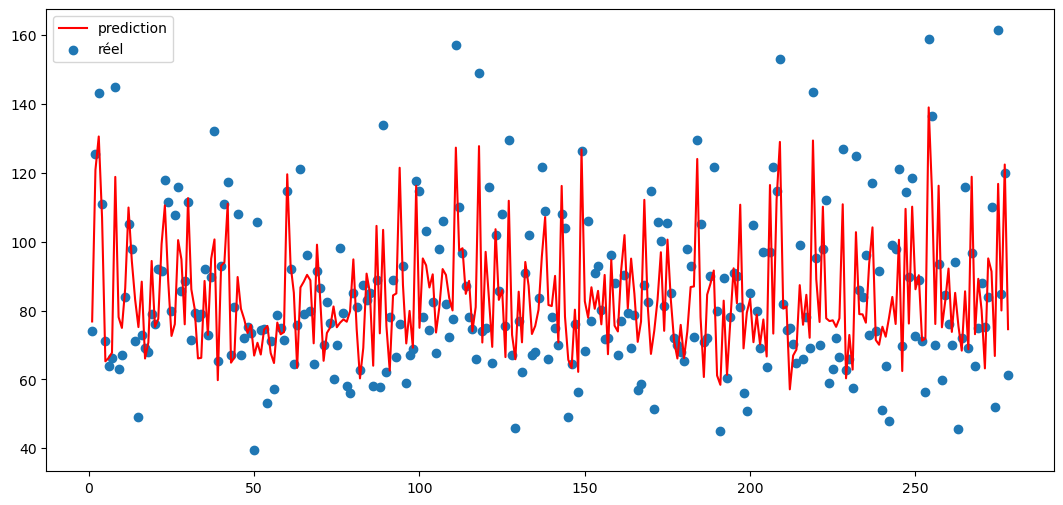

In [46]:
x=range(1, len(y_test) + 1)
y=y_test
plt.figure(figsize=(13, 6))
y_pred=model1.predict(X_test_normalized)
plt.plot(x,y_pred,c='r',label='prediction')
plt.scatter(x,y_test,label='réel')
plt.legend()
plt.show()